### Identifying country names from incomplete house addresses

#### 1. Import Dependencies

In [1]:
import os
import zipfile
import pandas as pd 
from pathlib import Path 
from arcgis.gis import GIS
from arcgis.learn import prepare_textdata 
from arcgis.learn.text import TextClassifier


torch not available

torch not available



#### 2. Data Preparation

In [15]:
filepath = 'country_classifier.zip'

ERROR! Session/line number was not unique in database. History logging moved to new session 403


In [7]:
with zipfile.ZipFile(filepath, 'r') as zip_ref:
    zip_ref.extractall(Path(filepath).parent)

PermissionError: [Errno 13] Permission denied: 'country_classifier\\house-addresses.csv'

In [16]:
DATA_ROOT = Path(os.path.join(os.path.splitext(filepath)[0]))

In [17]:
data = prepare_textdata(DATA_ROOT, "classification", train_file="country_addresses.csv", 
                        text_columns="Address", label_columns="Country", batch_size=64)

In [18]:
print(data.classes)

['ES', 'AU', 'CA', 'BE']


In [19]:
data.show_batch(10) 

source,target
"7, CL PPE ASTURIAS (BALSI) (BALSICAS), 30591",ES
"49, MONTGOMERY ROAD, MONTGOMERY, VIC, 3851",AU
"17, CL LINNE, DE, 8224",ES
"33537, BRUCE HIGHWAY, SHIRBOURNE, QLD, 4809",AU
"28, Belva, 7730",BE
"2, CL BOCINEGRO, 35660",ES
"401, PALISADES WAY, Strathcona County, AB",CA
"1487, boulevard Alexis-Nihon",CA
"7848, Route 112, Hunters Home, Queens",CA
"230, Fauvin, 5540",BE


#### 3. TextClassifier Model

In [20]:
print(TextClassifier.supported_backbones)

['BERT', 'RoBERTa', 'DistilBERT', 'ALBERT', 'FlauBERT', 'CamemBERT', 'XLNet', 'XLM', 'XLM-RoBERTa', 'Bart', 'ELECTRA', 'Longformer', 'MobileBERT', 'Funnel']


In [21]:
print(TextClassifier.available_backbone_models("xlm-roberta"))

('xlm-roberta-base', 'xlm-roberta-large')


#### 4. Load Model Architecture

In [22]:
model = TextClassifier(data, backbone="xlm-roberta-base")

#### 5. Model Training

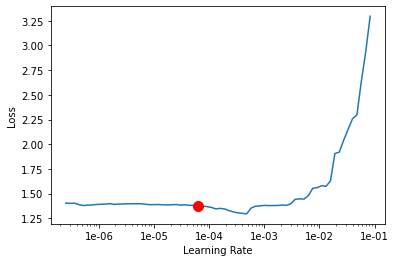

6.309573444801929e-05

In [23]:
model.lr_find()

In [24]:
model.fit(epochs=4, lr=0.001)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.357779,1.351297,0.377049,0.622951,01:21
1,1.458520,1.341853,0.377049,0.622951,01:29
2,1.456708,1.347509,0.377049,0.622951,01:35
3,1.431302,1.345740,0.377049,0.622951,01:42


In [25]:
# Unfreeze earlier layers to further fine-tune the model
model.unfreeze()

model.fit(epochs=6)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.342818,1.340286,0.377049,0.622951,01:54
1,1.356755,1.336986,0.377049,0.622951,02:01
2,1.357253,1.335367,0.377049,0.622951,01:55
3,1.355860,1.335350,0.377049,0.622951,01:47
4,1.350969,1.335450,0.377049,0.622951,01:51
5,1.349085,1.335476,0.377049,0.622951,01:46


#### 6. Validate the results

In [26]:
# After training, checking the results to see how it performs
model.show_results(15)

text,target,prediction
"303, UPPER PENNEYS HILL ROAD, ONKAPARINGA HILLS, SA, 5163",AU,BE
"1384, DANDENONG ROAD, UNIT 133, HUGHESDALE, VIC, 3166",AU,BE
"8, LONG ISLAND CIRCUIT, CRAIGIEBURN, VIC, 3064",AU,BE
"35, ANGELO STREET, UNIT 14, SOUTH PERTH, WA, 6151",AU,BE
"55, HODEL STREET, UNIT 3, HERMIT PARK, QLD, 4812",AU,BE
"1-5, WALKER PLACE, UNIT 3, GAWLER, SA, 5118",AU,BE
"24, ST ARNAUD ROAD, EYNESBURY, VIC, 3338",AU,BE
"18F, DERRICK STREET, JERRAMUNGUP, WA, 6337",AU,BE
"593, MARION BAY ROAD, MARION BAY, TAS, 7175",AU,BE
"3, CL S LLUIS DE (MIAMI PLATJA), 43892",ES,BE


#### 7. Test the model prediction on an input text

In [27]:
text = """1016, 8A, CL RICARDO LEON - SANTA ANA (CARTAGENA), 30319"""
print(model.predict(text))

('1016, 8A, CL RICARDO LEON - SANTA ANA (CARTAGENA), 30319', 'BE', 0.3776848316192627)


#### 8. Model metrics

In [28]:
# Check to see how accurate the model is in correctly predicting the classes in the dataset
model.accuracy()

0.377

In [29]:
# Also check precision, recall & f1 scores per label/class
model.metrics_per_label()

,Precision_score,Recall_score,F1_score,Support
AU,1.000,0.0,0.0000,10.0
BE,0.377,1.0,0.5476,23.0
CA,1.000,0.0,0.0000,12.0
ES,1.000,0.0,0.0000,16.0


#### 9. Get misclassified records

In [30]:
# To get the misclassified records we will call the model's get_misclassified_records method
misclassified_records = model.get_misclassified_records()

In [31]:
misclassified_records.style.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])\
        .set_properties(**{'text-align': "left"}).hide_index()

Address,Target,Prediction
"9B, CL GANADERIA, 22006",ES,BE
"35, ANGELO STREET, UNIT 14, SOUTH PERTH, WA, 6151",AU,BE
"7553, avenue Christophe-Colomb",CA,BE
"3, CL S LLUIS DE (MIAMI PLATJA), 43892",ES,BE
"55, HODEL STREET, UNIT 3, HERMIT PARK, QLD, 4812",AU,BE
"18, CL ALEJANDRO DAVILA LEON, 35212",ES,BE
"20, CL AGUSTIN PASTOR, 44141",ES,BE
"16, Oakdale AVE",CA,BE
"18417, 85 AVENUE NW",CA,BE
"303, UPPER PENNEYS HILL ROAD, ONKAPARINGA HILLS, SA, 5163",AU,BE


#### 10. Saving the trained model

In [32]:
# Save the model for interfencing on unseen data
model.save("country_classifier")

Computing model metrics...


WindowsPath('C:/Users/aviparna.biswas/Python Projects/ATOM/models/country_classifier')

#### 11. Model Inference

In [33]:
# Using the trained model to classify new text documents using the predict method
text_list = data._train_df.sample(15).Address.values
result = model.predict(text_list)

df = pd.DataFrame(result, columns=["Address", "CountryCode", "Confidence"])

df.style.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])\
        .set_properties(**{'text-align': "left"}).hide_index()

Address,CountryCode,Confidence
"4, WINHAM AVENUE, OLD REYNELLA, SA, 5161",BE,0.377685
"3, Wildstraat, Lommel, 3920",BE,0.377685
"43, CL SANTA ANA, 11339",BE,0.377685
"12, CL PUIG DE LA COVA (BONAVISTA), 43880",BE,0.377685
"688, Park St N, Peterborough",BE,0.377685
"42, Avenue de la Plante, 5000",BE,0.377685
"35, Rue Lacombe",BE,0.377685
"42, Asserendries, 9300",BE,0.377685
"46, Rue des Carrières, 7181",BE,0.377685
"13, CL MAREJADILLA, 21440",BE,0.377685
